/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

      Id  SalePrice
0    782     333547
1    783     195778
2    784     144910
3    785     221730
4    786     306881
..   ...        ...
191  973     103066
192  974     191698
193  975     108456
194  976     146671
195  977     184778

[196 rows x 2 columns]


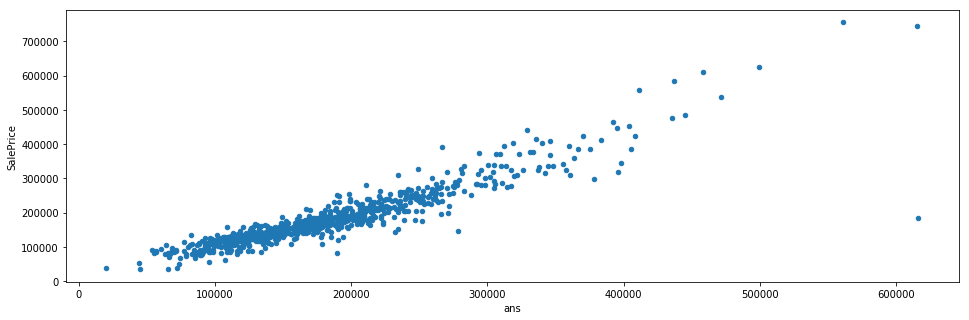

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns

import os
# Any results you write to the current directory are saved as output.
sample= pd.read_csv("/kaggle/input/mlcourse-2019-mai-autumn/sample.csv")
train= pd.read_csv("/kaggle/input/mlcourse-2019-mai-autumn/train.csv")
test= pd.read_csv("/kaggle/input/mlcourse-2019-mai-autumn/test.csv")
#print(sample.head())
df=train.select_dtypes(include = ['int64'])
colums=df.loc[:, df.columns != 'SalePrice'].columns.values
ln=colums.size
y=df.loc[:,df.columns == 'SalePrice'].values.T.astype(np.float64)
x=df.loc[:, (df.columns != 'SalePrice') ].values.T.astype(np.float64)
vx=test.select_dtypes(include = ['int64'])
tx=vx.values.T.astype(np.float64)
w=np.zeros([4,ln])
z=np.zeros(x.shape)

 
epochs = 1000
er=0.001
#print(w.sum(axis=0))
#print(x[0].size)
def myF(w,z,ln):
    t=np.zeros(x[0].size)
    for i in range(ln):
        t+=w[0][i]+w[1][i]*z[i]+w[2][i]*z[i]**2+w[3][i]*z[i]**3
    return t
pl=0.0000001
pm=0.00001
pu=0.0001
L=pu
for i in range(ln):
    tx[i]=(tx[i]-x[i].mean())
    z[i]=(x[i]-x[i].mean())
    tx[i]/=max(z[i].max(),-z[i].min())
    z[i]/=max(z[i].max(),-z[i].min())
for it in range(epochs):
    for i in range(ln):
        tmp=y[0]-myF(w,z,ln)
        w[3][i]=w[3][i]+L*(sum((z[i]**3)*tmp))
        w[2][i]=w[2][i]+L*(sum((z[i]**2)*tmp))
        w[1][i]=w[1][i]+L*(sum(z[i]*tmp))
        w[0][i]=w[0][i]+L*(sum(tmp))
    L-=pl
#print(w[0].sum() + w[1].dot(z)+w[2].dot(z**2)+w[3].dot(z**3))
df['ans']=w[0].sum() + w[1].dot(z)+w[2].dot(z**2)+w[3].dot(z**3)
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)
df.plot.scatter('ans','SalePrice',ax = ax1)
vx['SalePrice']=np.round(w[0].sum() + w[1].dot(tx)+w[2].dot(tx**2)+w[3].dot(tx**3))
vx['SalePrice']=vx['SalePrice'].astype(np.int64)
sample=vx[['Id','SalePrice']]
sample.set_index('Id')
print(sample)
sample.to_csv('sample.csv', index=False)